<a href="https://colab.research.google.com/github/cristian14296/ML-Applications_Actuarial_Sciences/blob/main/CA_Nov_2023_Naive_Bayes_MNIST_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit classifier and Image generator using Naive Bayes

## Introduction

The purpose of this Notebook is to apply statistical classification tools. There are two types of classification, when the groups are well defined and we try to determine criteria to be able to label each subject belonging to one of these groups or when we have no prior information and we want to delimit the data into their different classes. For this study, a database of 28x28 image digits was selected, which contain the numbers written from 0 to 9 by hand and it is desired to classify each of those images into its corresponding classification.

In many research practices, the execution of an adequate method or treatment begins with the elaboration of the diagnosis of the subject who needs data collection. An example was taken of a database of the type of images of handwritten numbers. The sample consisted of a total of 70,000 images (this data set contains a series of unspecified quantities for each of the 10 categories that it comprises), a sampling of this type allows a good general approach when identifying patterns in the handwriting of individuals from a particular place and therefore the identification of the individual. The diagnosis of human behavior and likewise its identification is essential at the time of an optimal society. Diagnostic aids become important tools for the researcher, however, the existence of different variables and analysis methods that are applied, in addition to the subjective emphasis of the researcher, who under his own criteria defines what methodologies he is going to use, how many variables he is going to use and on what tools he will rely, make these aids susceptible to errors and ambiguities.

In order to correct or address the problems that have been named, it is proposed to carry out a methodology in the first instance, Bayesian analysis as a statistical methodology has been developed and applied in various areas of knowledge in order to identify, classify and group variables that explain a given phenomenon. With this, the objective of the notebook is framed, to apply a tool in the classification of the relationship of different patterns of certain handwritings using the variables of the analysis obtained from a sample of selected images.

### Naive bayes

Naive Bayes is one of the classification methodologies that one should approach, so we bring this model to make an introduction to the operation, performance and also an application of it. We begin to observe that the name of this methodology indicates that we will work with Bayes' theorem, but the second part of it indicates 'Naive' or 'Ingenuous'. The algorithm took that name given the assumption that identifies it, which tells us that the presence of some characteristic in a class is totally independent (does not have a relationship) with some other characteristic of the same class.


**Indpendence Assumption**

An important assumption that the model takes into account is independence. Statistically, we name independence in the following way:
- $P[A|B] = P[A]$, this implies that the probability of A is not affected by the presence of B

his is discussed because the model takes each of the categories of individuals to be segmented and takes its characteristics independently, none of them affects the presence of the other characteristics.

**Naive Bayes algorithm pros and cons**
- Easy and quick way to predict segments/categories
- The independence assumption works well with models that contain few training data
- Estimates of low reliability, can be taken as a first approach to the behavior of the data
- he independence of the characteristics is very unlikely in real situations
- The estimates are limited to the data with which they have been trained.

### MNIST

The MNIST database, which stands for "Modified National Institute of Standards and Technology", is a popular dataset in the fields of computer vision and machine learning. It was created by the National Institute of Standards and Technology and then modified for use in portable fingerprint scanners.

In the MNIST database, there is a collection of granular images of handwritten numbers from 0 to 9. There is a number in the middle of each 28x28 pixel image. Since the images are labeled, it is possible to determine the number that appears in each one.

There are a total of 60,000 training images and 10,000 test images in the MNIST database, or 6,000 images per digit. Storing handwritten digital files in this location is a great idea. In the fields of machine learning and computer vision, the MNIST database has become a standard that is used to test and evaluate various benchmarks and machine learning algorithms. In the mining industry, it has also served as the basis for numerous projects and competitions due to its simplicity and accessibility

## Digit classification ussing Naive Bayes model approach

### Library and Data Definition

Import the necessary libraries

- Pandas 2.0.3: for data manipulation and analysis
- Sklearn fetch_openml 0.0.post9: for accessing and downloading datasets from OpenML
- sklearn.model_selection: for splitting datasets into training and test sets
- Matplotlib 3.7.2: for creating visualizations and plots
- Numpy 1.25.1: for efficient mathematical and numerical operations
- Warnings: for controlling and handling warnings
- Random: for generating random numbers and performing random operations
- Decomposition PCA: for dimensionality reduction
- Resample: for generating resampled datasets
- Naive_bayes GaussianNB: for the Gaussian version of the Naive Bayes model
- Naive_bayes BernoulliNB: for the Bernoulli version of the Naive Bayes model
- Metrics classification_report: for evaluating the performance of a classification model


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.utils import resample
from sklearn.metrics import classification_report
import random
import warnings

### Selecting Training Data and Testing Data

In this case, we are using the MNIST library because it is reproducible for users. This dataset contains 70,000 images of handwritten digits that have been encoded so that they can be visualized as a matrix. It has a series of numbers that tell us the color of each pixel (28x28), and a variable that tells us the digit to which that encoding belongs. This is divided into keys given the dictionary imported by the OpenML library

In [ ]:
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


We will visualize the keys of the imported MNIST object. In this, we will see, for example, data with the encoded images, the total categories it has, the variable that tells us each pixel example which handwritten number it represents, among other things.

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

We will print 'data', which has 784 columns (28x28). Each of these columns indicates the pixel and the value it takes for each of the encoded images.

In [ ]:
mnist.data.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'Target' indicates the category to which each of the pixel encodings belongs.

In [ ]:
mnist.target.head(2)

0    5
1    0
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

- 'frame' is the consolidation of 'data' and 'target'.

- 'categories' indicate the categories with which this dataset has, from 0 to 9.

- 'DESCR' gives us a description of the data, such as the author, the link where they are found, and a description of what the dataset contains.

- 'details' is a dictionary with the summarized information of DESCR.


We will visualize how one of these images looks like. With this said, exemplifying with some striking colors would indicate the representation of this intensity

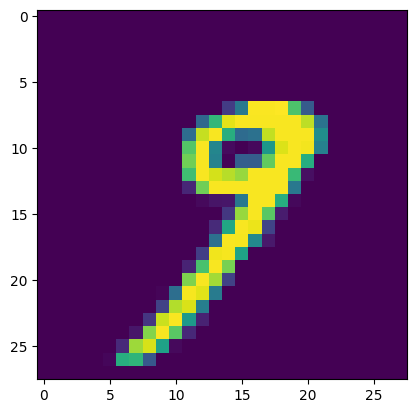

In [ ]:
plt.imshow(np.reshape(mnist.data.iloc[33].values, (28, 28)))

### Data understanding and cleansing

Understanding data is an important part of project analysis and comparison, and it involves a thorough study and analysis of existing data to understand its nature and quality. This includes identifying trends, patterns, and relationships between variables, as well as identifying and correcting missing or incorrect information. The goal is to carefully observe the data on which decisions are based, create accurate models, and identify possibilities, ensuring sound analysis and reliable results.

Given that the database with which we are working is constructed data, it has very good data quality.


We present the dimensions of each of the training and testing sets, and we also present an observation, but presenting it in grayscale for correct observation.

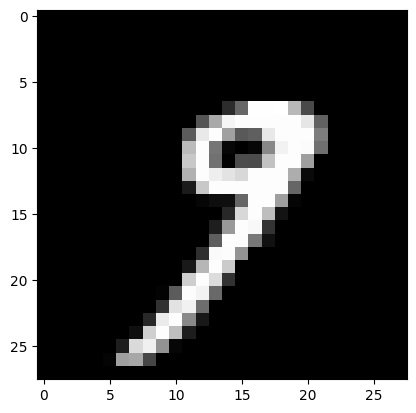

In [ ]:
plt.imshow(np.reshape(mnist.data.iloc[33].values, (28, 28)),cmap='gray')

Dimensiones del conjunto de datos: (70000, 784)


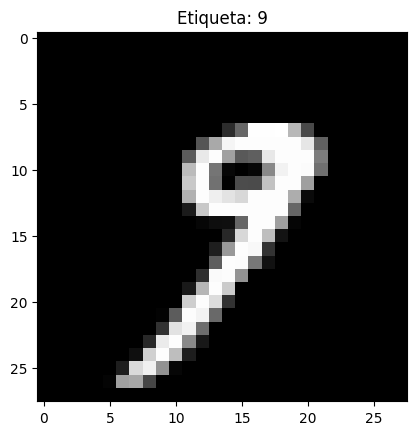

In [ ]:
# Dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de datos:", mnist.data.shape)

# Visualizar una imagen de ejemplo
plt.imshow(np.reshape(mnist.data.loc[33].values, (28, 28)),cmap='gray')
plt.title(f"Etiqueta: {mnist.target.loc[33]}")
plt.show()

Showing each one of the numbers, "Classes / Categories"

In [ ]:
target = mnist.target.to_frame()
data = mnist.data

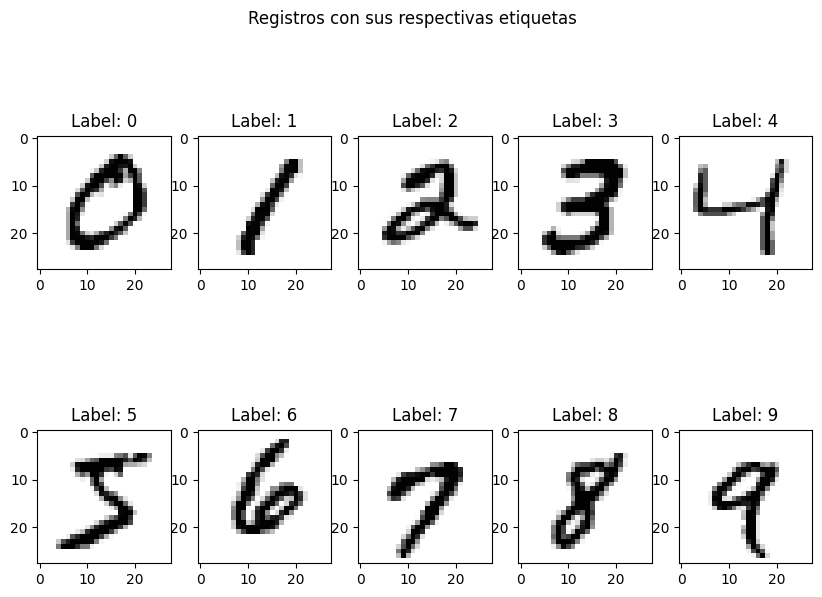

In [ ]:
# crear subplots por número
fig, ax = plt.subplots(2,5, figsize=(10,7))
for i, ax in enumerate(ax.flatten()):
    img_idx: int = target[target['class'] == str(i)].index[0]
    # tomar cada imagen y reescalar 28X28
    img: np.ndarray = np.reshape(data.iloc[img_idx].values, (28, 28))
    ax.imshow(img, cmap="gray_r") #plotear en escala de grises
    ax.set_title(f"Label: {i}") #agregar etiqueta
    ax.grid(False)
fig.suptitle("Registros con sus respectivas etiquetas")
plt.show()

We will see the number of classes/categories in the dataset, the classes in this case we consider from number 0 to 9. We also want to see the number of examples that each class counts, this is important since we need to identify if there is a class with a higher number of examples than the other classes.

We will present the mean of pixels and the deviation of pixels between photographs.

In [ ]:
# Número de clases (dígitos)
num_classes = len(np.unique(target))
print("Número de clases:", num_classes)

# Distribución de clases
unique, counts = np.unique(target, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Distribución de clases:", class_distribution)

# Estadísticas descriptivas de píxeles
pixel_mean = np.mean(data)
pixel_std = np.std(data)
print("Media de píxeles:", pixel_mean)
print("Promedio desviación estándar de píxeles:", np.mean(pixel_std))

Número de clases: 10
Distribución de clases: {'0': 6903, '1': 7877, '2': 6990, '3': 7141, '4': 6824, '5': 6313, '6': 6876, '7': 7293, '8': 6825, '9': 6958}


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Media de píxeles: pixel1      0.000000
pixel2      0.000000
pixel3      0.000000
pixel4      0.000000
pixel5      0.000000
              ...   
pixel780    0.001714
pixel781    0.000000
pixel782    0.000000
pixel783    0.000000
pixel784    0.000000
Length: 784, dtype: float64
Promedio desviación estándar de píxeles: 49.255352298398286


**Independence**:

One of the assumptions of the Naive Bayes model, which is the one that will be covered in this Notebook, is the independence between variables. With this, we will visualize the variables that have a correlation threshold of less than 0.1 or -0.1 since this suggests that the variables are mostly independent of each other.

To avoid getting into technical details with hypothesis tests, regression analysis, residuals, etc., we have that if most of the correlation values in the matrix are close to zero or very small (-0.1 and 0.1), this suggests that the variables are mostly independent of each other. This may be a somewhat non-robust approach given that it does not guarantee absolute independence, but it can be a good approach to this analysis

In [ ]:
# Calcular la matriz de correlación
matriz_correlacion = data.corr()
# Definir el rango de correlación
limite_inferior = -0.1
limite_superior = 0.1
# Contar las correlaciones en el rango definido
correlaciones_en_rango = ((matriz_correlacion >= limite_inferior) & (matriz_correlacion <= limite_superior)).sum().sum()
# Calcular la proporción de correlaciones en el rango
total_correlaciones = matriz_correlacion.size
proporcion_correlaciones_en_rango = correlaciones_en_rango / total_correlaciones
# Imprimir la proporción y evaluar si es baja o alta
print(f"La proporción de correlaciones en el rango ({limite_inferior}, {limite_superior}) es: {proporcion_correlaciones_en_rango}")
if proporcion_correlaciones_en_rango < 0.5:
    print("La proporción es baja, lo que sugiere independencia relativa entre variables.")
else:
    print("La proporción no es baja, lo que sugiere cierta dependencia entre variables.")

La proporción de correlaciones en el rango (-0.1, 0.1) es: 0.7150145772594753
La proporción no es baja, lo que sugiere cierta dependencia entre variables.


We can also use a method to easily check for dependence or multicollinearity. This tells us that if the determinant of a correlation matrix is equal to zero, this may indicate that there is a significant linear dependence between at least some of the variables in your data.

Before proceeding with this validation, it is correct to remove columns that have a variance equal to zero before calculating the determinant of the correlation matrix. A constant variable has no variability and does not contribute to the correlation relationships with other variables. Therefore, removing these columns will not negatively affect the quality of the correlation matrix and may help you avoid numerical problems, such as singularity (mathematical property of a matrix in which it is not possible to calculate its inverse).

In [ ]:
# Calcular el determinante de la matriz de correlación
warnings.filterwarnings("ignore")
df_sin_varianza_cero = data.loc[:, data.var() != 0]
matriz_correlacion = df_sin_varianza_cero.corr()
determinante = np.linalg.det(matriz_correlacion.to_numpy())
# Verificar si el determinante es igual a cero (indicación de multicolinealidad)
if abs(determinante) < 0.1:
    print("El determinante es aproximadamente cero, lo que indica multicolinealidad.")
else:
    print("El determinante no es igual a cero, lo que sugiere que no hay multicolinealidad significativa.")

El determinante es aproximadamente cero, lo que indica multicolinealidad.


Principal components analysis (PCA) is a multivariate analysis technique that allows you to reduce the dimensionality of data and find components that are linearly independent. With this said about this methodology, we can proceed with it to guarantee the biggest assumption that Naive Bayes has.

** Data Balancing**

Data classification validation is critical in classification problems because it affects the performance of machine learning models. These algorithms frequently experience class imbalance, which causes bias and makes it difficult to predict large subgroups. Additionally, it avoids overfitting and ensures accurate and reliable interpretation of results, which is essential for finding a model that is stable in practical settings and for making accurate and reliable data-driven decisions.

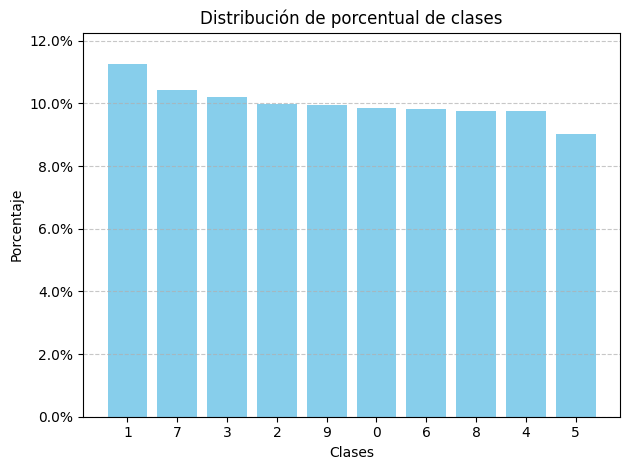

In [ ]:
# Calcular la distribución de clases en porcentajes
distribucion_porcentual = target['class'].value_counts(normalize=True) * 100
# Crear un gráfico de barras con porcentajes
plt.bar(distribucion_porcentual.index, distribucion_porcentual.values, color='skyblue')
plt.xlabel('Clases')
plt.ylabel('Porcentaje')
plt.title('Distribución de porcentual de clases')
# Establecer el límite del eje y de 0 a 100 para representar porcentajes
plt.ylim(0, 100)

# Ajustar el límite superior del eje y para mostrar más allá del 15%
plt.ylim(0, max(distribucion_porcentual.values) + 1)  # Ajustar límite superior

plt.xticks(rotation=0)  # Evitar rotación de etiquetas en el eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de referencia horizontal
plt.gca().yaxis.set_major_formatter('{:.1f}%'.format)  # Formato de porcentaje en el eje y
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

At this point, we see that the data imbalance is not visually relevant. To quantify this hypothesis, we should proceed with some methodology that helps us say if that difference is significant. Since we are not focused on this at the moment, we will proceed with data balancing with the possibility that readers have a tool on how to proceed if this difference is significant.

In the same way, we quantify the greatest differences that exist in these categories:

In [ ]:
# Calcular la distribución de clases en términos de frecuencia
distribucion_frecuencia = target['class'].value_counts()
# Obtener la categoría que tiene más observaciones
categoria_mas_frecuente = distribucion_frecuencia.idxmax()
# Obtener la categoría que tiene menos observaciones
categoria_menos_frecuente = distribucion_frecuencia.idxmin()
# Calcular la diferencia en términos de frecuencia
diferencia_frecuencia = distribucion_frecuencia[categoria_mas_frecuente] - distribucion_frecuencia[categoria_menos_frecuente]
# Calcular la diferencia en términos de porcentaje
total_muestras = len(target)
porcentaje_mas_frecuente = (distribucion_frecuencia[categoria_mas_frecuente] / total_muestras) * 100
porcentaje_menos_frecuente = (distribucion_frecuencia[categoria_menos_frecuente] / total_muestras) * 100
diferencia_porcentaje = porcentaje_mas_frecuente - porcentaje_menos_frecuente

print(f"Categoría más frecuente: {categoria_mas_frecuente}")
print(f"Categoría menos frecuente: {categoria_menos_frecuente}")
print(f"Diferencia en términos de frecuencia: {diferencia_frecuencia}")
print(f"Diferencia en términos de porcentaje: {diferencia_porcentaje:.2f}%")


Categoría más frecuente: 1
Categoría menos frecuente: 5
Diferencia en términos de frecuencia: 1564
Diferencia en términos de porcentaje: 2.23%


We proceed with data balancing

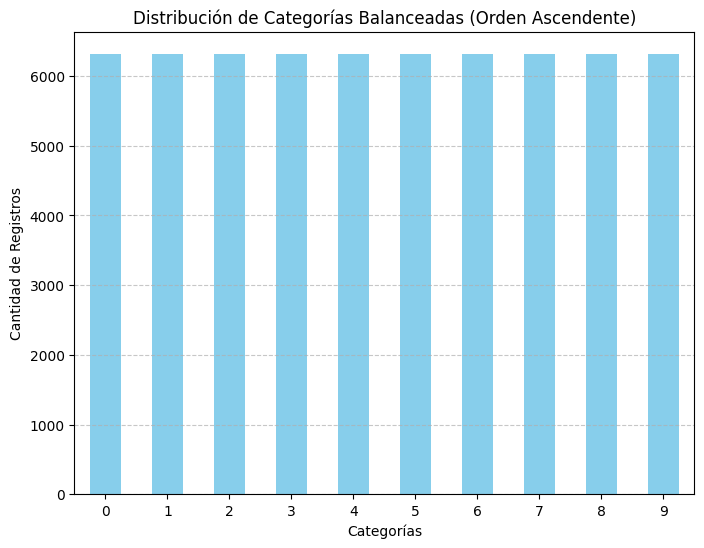

In [ ]:
mnist_consolidado = pd.concat([mnist.data, mnist.target], axis = 1)
# Se selecciona la cantidad mínima entre las clases
min_clase = mnist_consolidado['class'].value_counts().min()
# Crea un DataFrame vacío para almacenar las muestras equilibradas
df_balanceado_final = pd.DataFrame()
# Realiza el muestreo estratificado para cada categoría
for clase in mnist_consolidado['class'].unique():
    clase_df = mnist_consolidado[mnist_consolidado['class'] == clase]
    muestras_equilibradas = resample(clase_df, replace=True, n_samples=min_clase)
    df_balanceado_final = pd.concat([df_balanceado_final, muestras_equilibradas])
df_balanceado_final.rename(columns={'class': 'target'}, inplace=True)
# Verificar la distribución de clases después del balanceo y creación de gráfico
plt.figure(figsize=(8, 6))
df_balanceado_final['target'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xticks(rotation=0)  # Evitar rotación de etiquetas en el eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de referencia horizontal
plt.xlabel('Categorías')
plt.ylabel('Cantidad de Registros')
plt.title('Distribución de Categorías Balanceadas (Orden Ascendente)')
plt.show()

### Modellinng

As a first step, we must separate the data into two groups: the model training data and the test data. To evaluate the performance of a model in an unbiased way, we divide the database into these two aforementioned groups. The training data is used to create and adjust the model, and the test data is only used to evaluate the performance of the model on data that has not been seen before. This helps to evaluate the generalization of the model and avoid overfitting, ensuring that it is applicable in real-world scenarios.

In [ ]:
# Especificar las características (X) y la variable objetivo (y)
X = df_balanceado_final.drop('target', axis=1)
y = df_balanceado_final['target']
# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Verificar el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 44191
Tamaño del conjunto de prueba: 18939


In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

Since we noticed a dependency between the original variables in previous steps, Principal Component Analysis is used to establish new independent variables. This is significant because the main assumption of Naive Bayes is that the different predictive models are independent of each other. The original Naive Bayes objective can be better achieved and the interdependence between variables can be reduced by converting the original variables into large uncorrelated components. This will improve the fit of the model and its ability to make accurate predictions

In [ ]:
# Inicializar el objeto PCA con la cantidad de varianza explicada deseada (0.95)
pca = PCA(n_components=0.95)
# Aplicar PCA a los datos de entrenamiento
X_train_pca = pca.fit_transform(X_train)
# Aplicar la misma transformación PCA a los datos de prueba
X_test_pca = pca.transform(X_test)
# Crear nuevos DataFrames con las componentes principales para entrenamiento y prueba
df_train_pca = pd.DataFrame(data=X_train_pca)
df_test_pca = pd.DataFrame(data=X_test_pca)
# Verificar la cantidad de componentes principales seleccionadas
n_componentes = pca.n_components_
print(f"Número de componentes principales seleccionadas: {n_componentes}")

Número de componentes principales seleccionadas: 153


According to the characteristics of the original variables, which are considered different and similar, the principal components produced by the multivariate principal components methodology represent a reduction in the number of original data. This makes the study of Gaussian Naive Bayes models relevant in this situation.

Because the components produced by PCA are approximately Gaussian due to their assumption of normality, we know that this assumption is not strictly met in all cases. In this case, we will assume it to be true to simplify the analysis.

In addition, given that the principal components in this situation represent a continuous representation of the data, the other versions of the model that are for discrete data, such as polynomials and Bernoulli, are also ignored.

Therefore, when making probabilistic predictions in an environment with continuous variables, Gaussian Naive Bayes becomes a logical option

In [ ]:
model = GaussianNB()
model.fit(X_train_pca, y_train)

GaussianNB()

In [ ]:
pred_y = model.predict(X_test_pca)
pred_y

array(['2', '4', '1', ..., '3', '1', '2'], dtype='<U1')

### Model Evaluation

The performance of the selected model is intended to be evaluated under the assumptions, given that in this scenario only one model is available for evaluation. Therefore, another version of the model is proposed with the objective of analyzing its predictive ability and its effectiveness in the specific task.

For this case, we will take the data that does not have the principal component processing to have the discrete and non-continuous variables, given that the method to be presented is the multinomial version of Naive Bayes. With this said, we will create the data sets for training and testing again, but with the raw data but balanced.

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=42)

Model Generation

In [ ]:
model_2 = BernoulliNB()
model_2.fit(X_train_2, y_train_2)

BernoulliNB()

In [ ]:
pred_y_2 = model_2.predict(X_test_2)
pred_y_2

array(['4', '3', '1', ..., '4', '4', '7'], dtype='<U1')

**Evaluation**

We proceed with the comparison of these two models, for a comprehensive evaluation of the effectiveness of the speakers, including accuracy, the area under the ROC curve (AUC-ROC), and the F1 score. Accuracy measures the proportion of accurate predictions, AUC-ROC evaluates a model's ability to distinguish between classes, and F1-Score combines fairness and goodness to succeed in both classes, that is, to avoid false positives and false negatives. These metrics are selected because they offer a comprehensive view of the model's performance in all areas.

In [ ]:
# Generar informes de clasificación para ambos modelos
report_modelo1 = classification_report(y_test, pred_y)
report_modelo2 = classification_report(y_test_2, pred_y_2)

# Imprimir los informes de clasificación para ambos modelos
print("Informe de Clasificación para Gaussian Naive Bayes:")
print(report_modelo1)
print("\nInforme de Clasificación para Multinomial Naive Bayes:")
print(report_modelo2)


Informe de Clasificación para Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1883
           1       0.98      0.94      0.96      1920
           2       0.67      0.87      0.76      1896
           3       0.84      0.83      0.83      1873
           4       0.89      0.82      0.85      1864
           5       0.81      0.83      0.82      1906
           6       0.94      0.88      0.91      1872
           7       0.93      0.82      0.87      1935
           8       0.85      0.85      0.85      1882
           9       0.79      0.82      0.80      1908

    accuracy                           0.86     18939
   macro avg       0.87      0.86      0.86     18939
weighted avg       0.87      0.86      0.86     18939


Informe de Clasificación para Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1907
           1       0.84 

The results of each of the models were shown above. If we want to indicate which one is the best according to some metric, we proceed with the following code. A function is generated where we indicate with respect to which variable we will generate the comparison.

In [ ]:
def comparar_modelos(metrica="accuracy"):
    # generación del reporte en forma de diccionario
    report_modelo1 = pd.DataFrame(classification_report(y_test, pred_y, output_dict=True)).transpose()
    report_modelo2 = pd.DataFrame(classification_report(y_test_2, pred_y_2, output_dict=True)).transpose()
    # Obtener la métrica específica para ambos modelos
    metrica_modelo1 = report_modelo1[metrica]['weighted avg']
    metrica_modelo2 = report_modelo2[metrica]['weighted avg']
    # Comparar los modelos según la métrica
    if metrica_modelo1 > metrica_modelo2:
        return "El modelo 1 es mejor, con: " + str(round(metrica_modelo1*100,2)) +"% y una diferencia es de: " + str(round(metrica_modelo1 - metrica_modelo2,2)*100) + " %"
    elif metrica_modelo2 > metrica_modelo1:
        return "El modelo 2 es mejor, con: " + str(round(metrica_modelo2*100,2)) +"% y una diferencia es de: " + str(round(metrica_modelo2 - metrica_modelo1,1)*100) + " %"
    else:
        return "Ambos modelos tienen el mismo rendimiento."

Given the creation of the function that will help us to determine which model has a better performance with respect to a specific metric, we leave the metrics by which we can proceed with the comparison:

1.Precision
2.Recall
3. F1-Score



In [ ]:
resultado = comparar_modelos(metrica="f1-score")
print(resultado)

El modelo 1 es mejor, con: 85.95% y una diferencia es de: 3.0 %


### Images generative Processing

The size of the dataset can be increased or more samples to train or test a machine learning model could be added by creating new images using probabilities determined by a naive Bernoulli Bayesian model. This can be beneficial for both comparing imbalanced profiles and developing composite profiles. Using areas calculated by the model to verify features in the new image can generate content that is similar to the original image and at the same time different from it. Among its multiple uses is to improve the performance of models with scarce data.

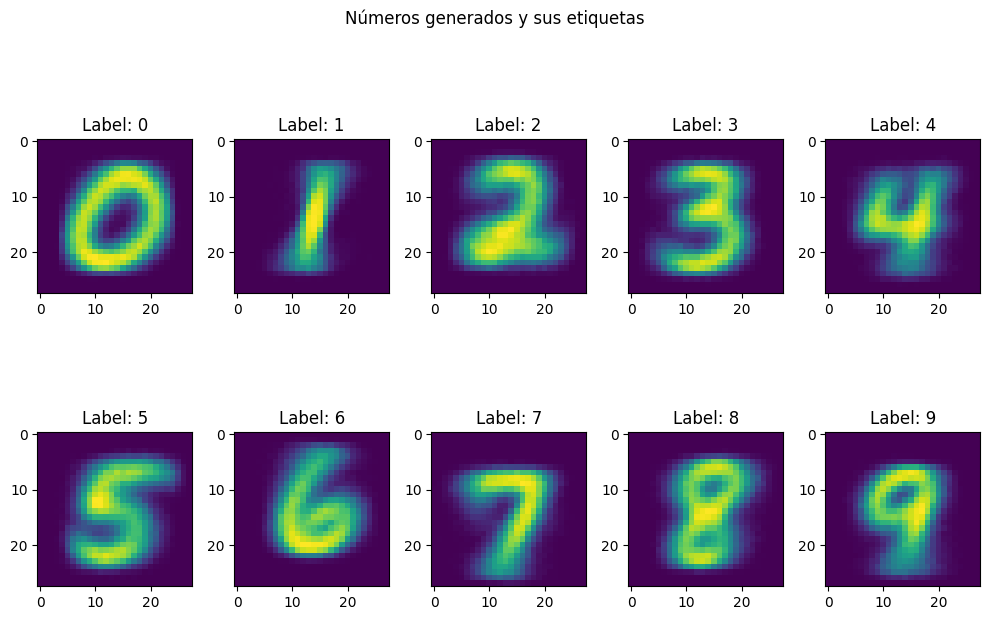

In [ ]:
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(2,5, figsize=(10,7))
# crear subtrama para cada dígito
for i, ax in enumerate(ax.flatten()):
    # obtener una muestra de la distribución de Bernoulli con probabilidades p
    imagen = pd.DataFrame()
    for j in range(1000): # Se genera este bucle para poder generar una mejor imagen con multiples iteraciones
        imagen[j] = np.random.binomial(1,np.exp(model_2.feature_log_prob_[i]), 784)
    vec_generated = imagen.mean(axis=1)
    # reshape el vector a una imagen de 28X28
    img = np.array(vec_generated).reshape((28, 28))
    # plot imagen de dígitos
    ax.imshow(img)
    # agregar label
    ax.set_title(f"Label: {i}")
    ax.grid(False)
fig.suptitle("Números generados y sus etiquetas")
fig.tight_layout()
plt.show()

### Conclussion

In general, the simplified PCA model and the Gaussian Naive Bayes model outperformed the other tested model in terms of classification. Unlike Gaussian Naive Bayes, which works well with continuous data, PCA helps to reduce dimensionality and independence of variables, so this is to be expected. Curiously, even the multinomial model, which does not adjust the independence of the variables, works well. However, to draw a conclusion, it is suggested to compare the models convered in this notebook with other datasets in order to check the performance.